# apply家族函数

主要思想：用向量计算代替循环计算，目前apply主要家族函数包括：
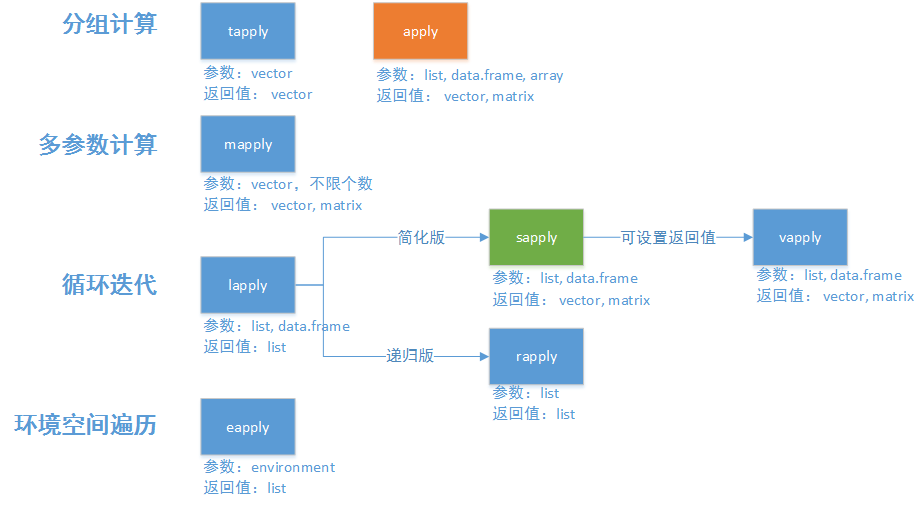

内容：
apply函数
lapply函数
sapply函数
vapply函数
mapply函数
tapply函数
rapply函数
eapply函数

## 1.apply函数

apply函数可以对矩阵，数据框，数组按行或列进行循环计算，对子元素进行迭代，并把子元素以参数传递的形式给自定义的FUN函数中，并以返回计算结果。

函数定义：

apply(X, MARGIN, FUN, ...)

参数列表：

* X:数组、矩阵、数据框
* MARGIN: 按行计算或按按列计算，1表示按行，2表示按列
* FUN: 自定义的调用函数
* …: 更多参数，可选

比如，对一个矩阵的每一行求和，下面就要用到apply做循环了。

In [1]:
x <- matrix(1:12, ncol = 3)
apply(x,1,sum)

[1] 15 18 21 24

下面计算一个稍微复杂点的例子，按行循环，让数据框的x1列加1，并计算出x1,x2列的均值。

In [3]:
# 生成dataframe
x <- cbind(x1 = 3, x2 = c(4:1,2:5))
x

x1,x2
3,4
3,3
3,2
3,1
3,2
3,3
3,4
3,5


In [18]:
# 自定义函数myFUN，第一个参数x为数据
# 第二、三个参数为自定义参数，可以通过apply的'...'进行传入。
myFUN<- function(x, c1, c2) {
   c(sum(x[c1],1), mean(x[c2])) }

In [19]:
# 把数据框按行做循环，每行分别传递给myFUN函数，设置c1,c2对应myFUN的第二、三个参数
apply(x,1,myFUN,c1='x1',c2=c('x1','x2'))

4.0,4,4.0,4,4.0,4,4.0,4
3.5,3,2.5,2,2.5,3,3.5,4


注意点：apply函数返回时矩阵是以列为单位的，每一个循环输出一个以列为单位的结果，第一列即第一个结果，第二列则为第二个结果，上述函数的解释为：
apply中的1代表的是以行为单位计算，此时选中x的每一个行，第一次循环就是第一个行带入到myFUN函数中计算，输出结果有两个4.0和3.5，以列的形式展示出来

如果使用for运算的话，代码如下：

In [24]:
df <- data.frame()
for(i in 1:nrow(x)){
    row <- x[i,]
    df <- rbind(df, rbind(c(sum(row[1],1), mean(row))))
}
df

V1,V2
<dbl>,<dbl>
4,3.5
4,3.0
4,2.5
4,2.0
4,2.5
4,3.0
4,3.5
4,4.0


通过for循环的方式，也可以很容易的实现上面计算过程，但是这里还有一些额外的操作需要自己处理，比如构建循环体、定义结果数据集、并合每次循环的结果到结果数据集。

对于上面的需求，还有第三种实现方法，那就是完成利用了R的特性，通过向量化计算来完成的。

In [26]:
data.frame(x1=x[,1]+1, x2=rowMeans(x))

x1,x2
<dbl>,<dbl>
4,3.5
4,3.0
4,2.5
4,2.0
4,2.5
4,3.0
4,3.5
4,4.0


接下来，我们需要再比较一下3种操作上面性能上的消耗。

In [28]:
# 清空环境变量
rm(list=ls())

# 封装fun1
fun1 <- function(x){
    myFUN<- function(x, c1, c2) {
   c(sum(x[c1],1), mean(x[c2])) }
    apply(x,1,myFUN,c1='x1',c2=c('x1','x2'))
}

# 封装Fun2
fun2 <- function(x){
    df <- data.frame()
for(i in 1:nrow(x)){
    row <- x[i,]
    df <- rbind(df, rbind(c(sum(row[1],1), mean(row))))
}
}

# 封装fun3
fun3 <- function(x){
    data.frame(x1=x[,1]+1, x2=rowMeans(x))
}

# 生成数据框
x <- cbind(x1=3, x2=c(400:1,2:500))

In [29]:
# 分别计算3种方法的CPU消耗
system.time(fun1(x))
system.time(fun2(x))
system.time(fun3(x))

 用户  系统  流逝 
0.006 0.000 0.006 

 用户  系统  流逝 
0.125 0.006 0.132 

用户 系统 流逝 
   0    0    0 

从CPU的耗时来看，用for循环实现的计算是耗时最长的，apply实现的循环耗时很短，而直接使用R语言内置的向量计算的操作几乎不耗时。通过上面的测试，对同一个计算来说，优先考虑R语言内置的向量计算，必须要用到循环时则使用apply函数，应该尽量避免显示的使用for,while等操作方法。

## 2.lapply函数

lapply函数是一个最基础循环操作函数之一，用来对list、data.frame数据集进行循环，并返回和X长度同样的list结构作为结果集，通过lapply的开头的第一个字母’l’就可以判断返回结果集的类型。

函数定义：

lapply(X, FUN, ...)
参数列表：

* X:list、data.frame数据
* FUN: 自定义的调用函数
* …: 更多参数，可选

比如，计算list中的每个KEY对应该的数据的分位数。

In [30]:
# 构建一个list数据集x，分别包括abc三个key值
x <- list(a = 1:10, b=rnorm(6,10,5), c=c(T,F,F,T))
x

$a
 [1]  1  2  3  4  5  6  7  8  9 10

$b
[1]  9.132234  9.870554  6.758805 12.583614 20.927168 11.403027

$c
[1]  TRUE FALSE FALSE  TRUE

In [31]:
#分别计算每个KEY对应的数据的分位数
lapply(x, fivenum)

$a
[1]  1.0  3.0  5.5  8.0 10.0

$b
[1]  6.758805  9.132234 10.636790 12.583614 20.927168

$c
[1] 0.0 0.0 0.5 1.0 1.0

lapply就可以很方便地把list数据集进行循环操作了，还可以用data.frame数据集按列进行循环，但如果传入的数据集是一个向量或矩阵对象，那么直接使用lapply就不能达到想要的效果了。

比如，对矩阵的列求和。


In [32]:
# 生成一个矩阵
x <- cbind(x1=3, x2=c(2:1,4:5))
x
class(x)

x1,x2
3,2
3,1
3,4
3,5


[1] "matrix" "array"

In [33]:
# 求和
lapply(x,sum)

[[1]]
[1] 3

[[2]]
[1] 3

[[3]]
[1] 3

[[4]]
[1] 3

[[5]]
[1] 2

[[6]]
[1] 1

[[7]]
[1] 4

[[8]]
[1] 5

lapply会分别循环矩阵中的每个值，而不是按行或按列进行分组计算。

如果对数据框的列求和。

In [34]:
lapply(data.frame(x), sum)

$x1
[1] 12

$x2
[1] 12

lapply会自动把数据框按列进行分组，再进行计算。

## 3.sapply函数

sapply函数是一个简化版的lapply，sapply增加了2个参数simplify和USE.NAMES，主要就是让输出看起来更友好，返回值为向量，而不是list对象。

函数定义：

sapply(X, FUN, ..., simplify=TRUE, USE.NAMES = TRUE)
参数列表：

* X:数组、矩阵、数据框
* FUN: 自定义的调用函数
* …: 更多参数，可选
* simplify: 是否数组化，当值array时，输出结果按数组进行分组
* USE.NAMES: 如果X为字符串，TRUE设置字符串为数据名，FALSE不设置

我们还用上面lapply的计算需求进行说明。

In [35]:
x <- cbind(x1=3,x2=c(2:1,4:5))

In [36]:
#对矩阵计算，计算过程同lapply函数
sapply(x,sum)

[1] 3 3 3 3 2 1 4 5

In [37]:
#对数据框进行计算
sapply(data.frame(x), sum)

x1 x2 
12 12

In [38]:
#检查结果类型，sapply返回类型为向量，而lapply返回类型为list
class(lapply(x,sum))

class(sapply(x,sum))

[1] "list"

[1] "numeric"

如果simplify=FALSE和USE.NAMES=FALSE，那么完全sapply函数就等于lapply函数了。

In [39]:
lapply(data.frame(x), sum)
sapply(data.frame(x), sum, simplify=F, USE.NAMES=F)

$x1
[1] 12

$x2
[1] 12

$x1
[1] 12

$x2
[1] 12

对于simplify为array时，我们可以参考下面的例子，构建一个三维数组，其中二个维度为方阵。

In [40]:
a <- 1:2

#按数组分组
sapply(a,function(x) matrix(x,2,2), simplify="array")

, , 1

     [,1] [,2]
[1,]    1    1
[2,]    1    1

, , 2

     [,1] [,2]
[1,]    2    2
[2,]    2    2

In [41]:
#默认情况下，则自动合并分组
sapply(a,function(x) matrix(x,2,2))

1,2
1,2
1,2
1,2


对于字符串的向量，还可以自动生成数据名。

In [42]:
val <- head(letters)

In [43]:
sapply(val,paste,USE.NAMES=T)

a   b   c   d   e   f 
"a" "b" "c" "d" "e" "f"

In [45]:
sapply(val, paste, USE.NAMES=F)

[1] "a" "b" "c" "d" "e" "f"

## 4.vapply函数

vapply类似于sapply，提供了FUN.VALUE参数，用来控制返回值的行名，这样可以让程序更健壮。

函数定义：

vapply(X, FUN, FUN.VALUE, ..., USE.NAMES = TRUE)
参数列表：

* X:数组、矩阵、数据框
* FUN: 自定义的调用函数
* FUN.VALUE: 定义返回值的行名row.names
* …: 更多参数，可选
* USE.NAMES: 如果X为字符串，TRUE设置字符串为数据名，FALSE不设置

比如，对数据框的数据进行累计求和，并对每一行设置行名row.names

In [46]:
# 生成数据集
x <- data.frame(cbind(x1=3, x2=c(2:1,4:5)))

#设置行名，4行分别为a,b,c,d
vapply(x, cumsum, FUN.VALUE=c("a"=0, "b"=0, "C"=0, "d"=0))

,x1,x2
a,3,2
b,6,3
C,9,7
d,12,12


In [47]:
#当不设置时，为默认的索引值
a <- sapply(x, cumsum)
a

#手动方式设置行名
rownames(a) <- c("a","b","c","d")
a

x1,x2
3,2
6,3
9,7
12,12


,x1,x2
a,3,2
b,6,3
c,9,7
d,12,12


通过使用vapply可以直接设置返回值的行名，这样子做其实可以节省一行的代码，让代码看起来更顺畅，当然如果不愿意多记一个函数，那么也可以直接忽略它，只用sapply就够了。

## 5.mapply函数

mapply也是sapply的变形函数，类似多变量的sapply，但是参数定义有些变化。第一参数为自定义的FUN函数，第二个参数’…’可以接收多个数据，作为FUN函数的参数调用。

函数定义：

mapply(FUN, ..., MoreArgs = NULL, SIMPLIFY = TRUE,USE.NAMES = TRUE)
参数列表：

* FUN: 自定义的调用函数
* …: 接收多个数据
* MoreArgs: 参数列表
* SIMPLIFY: 是否数组化，当值array时，输出结果按数组进行分组
* USE.NAMES: 如果X为字符串，TRUE设置字符串为数据名，FALSE不设置

比如，比较3个向量大小，按索引顺序取较大的值。

In [48]:
set.seed(1)
#定义3个向量
x<-1:10
y<-5:-4
z<-round(runif(10,-5,5))

#按索引顺去取较大值
mapply(max,x,y,z)

[1]  5  4  3  4  5  6  7  8  9 10

再看一个例子，生成4个符合正态分布的数据集，分别对应的均值和方差为c(1,10,100,1000)。

In [51]:
set.seed(1)

#长度为4
n<-rep(4,4)
#m为均值，v为方差
m<-v<-c(1,10,100,1000)

#生成4组数据，按列分组
mapply(rnorm,n,m,v)

0.3735462,13.295078,157.57814,378.7594
1.1836433,1.795316,69.46116,-1214.6999
0.1643714,14.874291,251.17812,2124.9309
2.5952808,17.383247,138.98432,955.0664


由于mapply是可以接收多个参数的，所以我们在做数据操作的时候，就不需要把数据先合并为data.frame了，直接一次操作就能计算出结果了。

## 6.tapply函数

tapply用于分组的循环计算，通过INDEX参数可以把数据集X进行分组，相当于group by的操作。

函数定义：

tapply(X, INDEX, FUN = NULL, ..., simplify = TRUE)
参数列表：

* X: 向量
* INDEX: 用于分组的索引
* FUN: 自定义的调用函数
* …: 接收多个数据
* simplify : 是否数组化，当值array时，输出结果按数组进行分组

比如，计算不同品种的鸢尾花的花瓣(iris)长度的均值。

In [52]:
# 通过iris$species品种进行分组
tapply(iris$Petal.Length, iris$Species, mean)

setosa versicolor  virginica 
     1.462      4.260      5.552

对向量x和y进行计算，并以向量t为索引进行分组，求和。

In [53]:
set.seed(1)
x<-y<-1:10
x
y

#设置分组t
t<-round(runif(10,1,100)%%2)
t

#对x分组进行求和
tapply(x,t,sum)

[1]  1  2  3  4  5  6  7  8  9 10

[1]  1  2  3  4  5  6  7  8  9 10

[1] 1 2 2 1 1 2 1 0 1 1

0  1  2 
 8 36 11

由于tapply只接收一个向量参考，通过’…’可以把再传给你FUN其他的参数，那么我们想去y向量也进行求和，把y作为tapply的第4个参数进行计算。

In [54]:
tapply(x,t,sum,y)

0  1  2 
63 91 66

得到的结果并不符合我们的预期，结果不是把x和y对应的t分组后求和，而是得到了其他的结果。第4个参数y传入sum时，并不是按照循环一个一个传进去的，而是每次传了完整的向量数据，那么再执行sum时sum(y)=55，所以对于t=0时，x=8 再加上y=55，最后计算结果为63。那么，我们在使用’…’去传入其他的参数的时候，一定要看清楚传递过程的描述，才不会出现的算法上的错误

## 7.rapply函数

rapply是一个递归版本的lapply，它只处理list类型数据，对list的每个元素进行递归遍历，如果list包括子元素则继续遍历。

函数定义：

rapply(object, f, classes = "ANY", deflt = NULL, how = c("unlist", "replace", "list"), ...)
参数列表：

* object:list数据
* f: 自定义的调用函数
* classes : 匹配类型, ANY为所有类型
* deflt: 非匹配类型的默认值
* how: 3种操作方式，当为replace时，则用调用f后的结果替换原list中原来的元素；当为list时，新建一个list，类型匹配调用f函数，不匹配赋值为* deflt；当为unlist时，会执行一次unlist(recursive = TRUE)的操作
* …: 更多参数，可选

比如，对一个list的数据进行过滤，把所有数字型numeric的数据进行从小到大的排序。

In [55]:
x=list(a=12,b=1:4,c=c("b","a"))
y=pi
z=data.frame(a=rnorm(10),b=1:10)
a<-list(x=x,y=y,z=z)

#进行排序，并替换原list的值
rapply(a,sort,classes="numeric",how="replace")

a,b
<dbl>,<int>
-2.2146999,1
-0.8204684,2
-0.6212406,3
-0.3053884,4
0.3898432,5
0.4874291,6
0.5757814,7
0.7383247,8
1.1249309,9


从结果发现，只有$z$a的数据进行了排序，检查$z$b的类型，发现是integer，是不等于numeric的，所以没有进行排序。

接下来，对字符串类型的数据进行操作，把所有的字符串型加一个字符串’++++’，非字符串类型数据设置为NA。

In [56]:
rapply(a,function(x) paste(x,"++++"), classes="character", deflt=NA, how="list")

$x
$x$a
[1] NA

$x$b
[1] NA

$x$c
[1] "b ++++" "a ++++"


$y
[1] NA

$z
$z$a
[1] NA

$z$b
[1] NA

只有$x$c为字符串向量，都合并了一个新字符串。那么，有了rapply就可以对list类型的数据进行方便的数据过滤了。

## 8.eapply函数

对一个环境空间中的所有变量进行遍历。如果我们有好的习惯，把自定义的变量都按一定的规则存储到自定义的环境空间中，那么这个函数将会让你的操作变得非常方便。当然，可能很多人都不熟悉空间的操作，那么请参考文章 揭开R语言中环境空间的神秘面纱，解密R语言函数的环境空间。

函数定义：

eapply(env, FUN, ..., all.names = FALSE, USE.NAMES = TRUE)
参数列表：

* env: 环境空间
* FUN: 自定义的调用函数
* …: 更多参数，可选
* all.names: 匹配类型, ANY为所有类型
* USE.NAMES: 如果X为字符串，TRUE设置字符串为数据名，FALSE不设置

下面我们定义一个环境空间，然后对环境空间的变量进行循环处理。


In [59]:
#定义一个函数空间
env <- new.env()

#向这个函数空间存入3个变量
env$a <- 1:10
env$beta <- exp(-3:3)
env$logic <- c(T,F,F,T)
env

<environment: 0x7fe28a0277e8>

In [60]:
#查看环境空间中的变量
ls(env)

[1] "a"     "beta"  "logic"

In [61]:
#计算环境空间所有变量中的均值
eapply(env,mean)

$a
[1] 5.5

$logic
[1] 0.5

$beta
[1] 4.535125

In [62]:
#再计算当前环境空间中变量占用内存的大小
ls()

eapply(environment(),object.size)

[1] "a"    "env"  "fun1" "fun2" "fun3" "m"    "n"    "t"    "v"    "val" 
[11] "x"    "y"    "z"

$t
176 bytes

$v
80 bytes

$x
736 bytes

$y
56 bytes

$z
1024 bytes

$env
56 bytes

$a
2256 bytes

$m
80 bytes

$n
80 bytes

$fun1
12800 bytes

$fun2
46376 bytes

$val
432 bytes

$fun3
5616 bytes


eapply函数平时很难被用到，但对于R包开发来说，环境空间的使用是必须要掌握的。特别是当R要做为工业化的工具时，对变量的精确控制和管理是非常必要的。

本文全面地介绍了，R语言中的数据循环处理的apply函数族，基本已经可以应对所有的循环处理的情况了。同时，在apply一节中也比较了，3种数据处理方面的性能，R的内置向量计算，要优于apply循环，大幅优于for循环。那么我们在以后的R的开发和使用过程中，应该更多地把apply函数使用好。

忘掉程序员的思维，换成数据的思维，也许你就一下子开朗了。